In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Reading in our data

In [2]:
df = pd.read_csv("../data/1k_positional_reinf.csv", index_col=False)
# df = df.drop_duplicates(subset=[str(x) for x in range(1, 10)])
df.drop(df[(df["label"] == 5) & (df["outcome"] != 1)].index, inplace=True)
df

,1,2,3,4,5,6,7,8,9,label,outcome,first
0,0,-1,-1,1,-1,0,1,0,0,9,-1,-1
1,1,0,0,-1,0,0,0,0,0,5,1,1
2,0,1,0,0,-1,-1,0,0,1,8,-1,1
3,-1,-1,0,0,1,1,1,-1,-1,4,1,-1
4,0,0,0,0,0,0,-1,1,-1,4,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3801,0,1,0,1,-1,-1,0,-1,0,1,1,-1
3802,0,-1,-1,-1,1,1,1,0,-1,1,0,-1
3803,0,0,0,0,0,0,0,0,0,2,1,1
3804,-1,0,-1,0,1,1,-1,1,-1,4,1,-1


Splitting data into features and labels, then swapping to vectorized format.

In [3]:
cols = [str(x) for x in range(1, 10)]
# cols += ["first"]
# cols += ["outcome"]
X = df[cols]
y = df["label"]
X, y

(      1  2  3  4  5  6  7  8  9
 0     0 -1 -1  1 -1  0  1  0  0
 1     1  0  0 -1  0  0  0  0  0
 2     0  1  0  0 -1 -1  0  0  1
 3    -1 -1  0  0  1  1  1 -1 -1
 4     0  0  0  0  0  0 -1  1 -1
 ...  .. .. .. .. .. .. .. .. ..
 3801  0  1  0  1 -1 -1  0 -1  0
 3802  0 -1 -1 -1  1  1  1  0 -1
 3803  0  0  0  0  0  0  0  0  0
 3804 -1  0 -1  0  1  1 -1  1 -1
 3805  1  0 -1 -1  0 -1  1  0  0
 
 [3629 rows x 9 columns],
 0       9
 1       5
 2       8
 3       4
 4       4
        ..
 3801    1
 3802    1
 3803    2
 3804    4
 3805    2
 Name: label, Length: 3629, dtype: int64)

In [4]:
X = X.values
y = y.values

X, y

(array([[ 0, -1, -1, ...,  1,  0,  0],
        [ 1,  0,  0, ...,  0,  0,  0],
        [ 0,  1,  0, ...,  0,  0,  1],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [-1,  0, -1, ..., -1,  1, -1],
        [ 1,  0, -1, ...,  1,  0,  0]], dtype=int64),
 array([9, 5, 8, ..., 2, 4, 2], dtype=int64))

Splitting training and validation data.

In [5]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [6]:
Xp = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])
yp = np.array([5])
class_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
model = MLPClassifier(hidden_layer_sizes=(150, 150, 150, 100, 50), activation='relu', max_iter=200)
# model = model.fit(train_X, train_y)
model.partial_fit(X=Xp, y=yp, classes=class_list)

MLPClassifier(hidden_layer_sizes=(150, 150, 150, 100, 50))

In [8]:
train_preds = model.predict(train_X)
predictions = model.predict(val_X)
accuracy_score(predictions, val_y), accuracy_score(train_preds, train_y)

(0.10792951541850221, 0.12127894156560089)

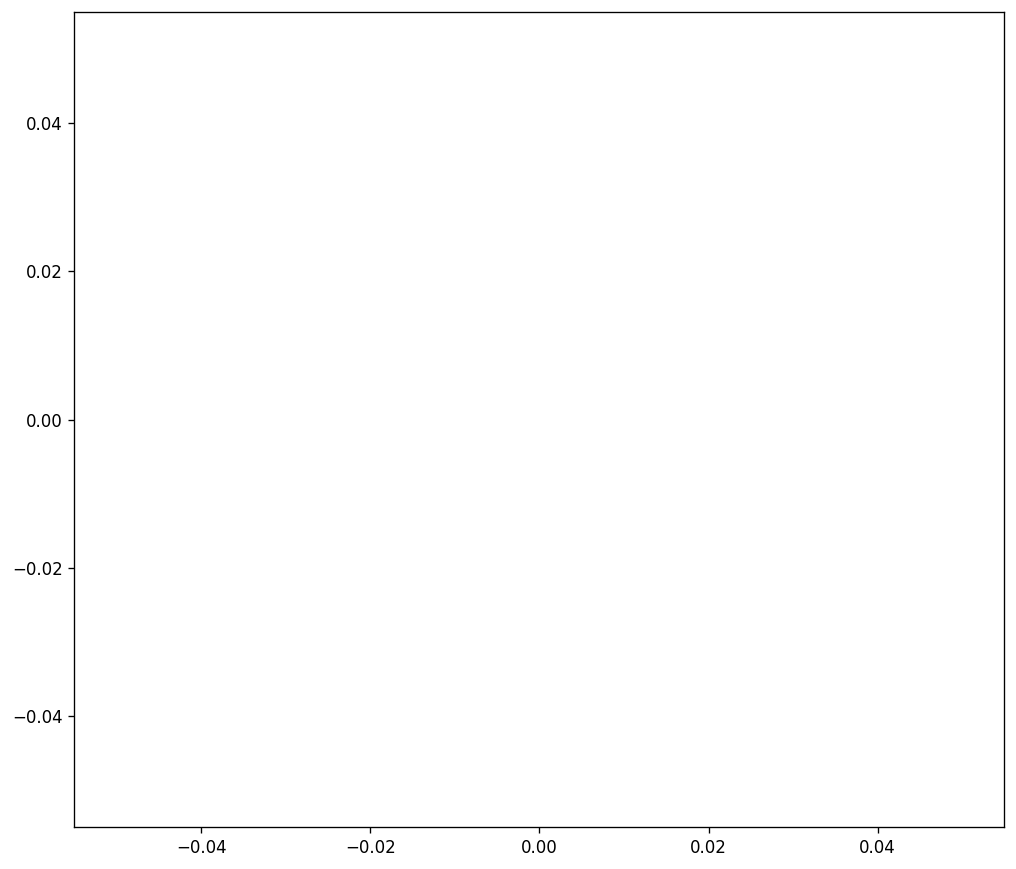

In [9]:
y_plot = model.loss_curve_[-1000:-1:1]
loss_ct = len(y_plot)
x_plot = range(loss_ct)

plt.figure(figsize=(10, 9), dpi=120)
plt.plot(x_plot, y_plot)
plt.show()

In [10]:
pickle.dump(model, open("../model_binaries/agent_relu.sav", "wb"))